## MOUNT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/MSc_project/.MAIN

In [1]:
os.chdir('G:\My Drive\MSc_project\.MAIN')


## analysis

In [2]:
import pandas as pd 
import pickle
import json
import os
import os.path
import numpy as np
import seaborn as sns
from collections import defaultdict
import joblib
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

import os


c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
hashtag = 'avengers'

save_path_t = f'tweets/{hashtag}/{hashtag}_ALL_and_GENDER.csv'


df = pd.read_csv(save_path_t)

df = df.drop(['text','user_id','grammartext','clean_text','text_len','punct','tokenized','nonstop','stemmed','tweet_id'], axis=1)

if 'grammar-sentence-score' in df.columns:
    df = df.drop(['grammar-sentence-score'], axis=1)

In [6]:
df['Unnamed: 0']

0       1555611200628588544
1       1555673060065288194
2       1555635972347502594
3       1555282590554374147
4       1555635112611614720
               ...         
2904                   1495
2905                   1496
2906                   1497
2907                   1498
2908                   1499
Name: Unnamed: 0, Length: 2909, dtype: int64

## Divide into Categorical or Continuous Data

In [12]:
# categorical data
cats =  ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'user_sentiment_mode','user_topic_mode']

# cateogrical df
cdf = df[cats]

# scores df
sdf = df.drop(cats,axis=1)

## Categorical Data!!!

In [71]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2494 entries, 1555684437077430272 to 142963564
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        2288 non-null   float64
 1   sentiment     2450 non-null   object 
 2   topic         2450 non-null   float64
 3   topic_single  2450 non-null   float64
 4   irony         2450 non-null   float64
 5   emoji         2450 non-null   float64
dtypes: float64(5), object(1)
memory usage: 136.4+ KB


Male      0.581294
Female    0.418706
Name: gender, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_10488\3885767587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(0,'Female',inplace=True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\3885767587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(1,'Male',inplace=True)


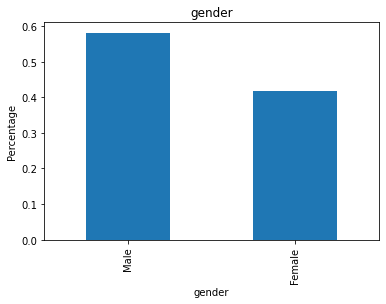

In [78]:
cols = cdf.columns.tolist()

cdf.gender.replace(0,'Female',inplace=True)
cdf.gender.replace(1,'Male',inplace=True)

col = cols[0]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')
plt.show()

sentiment
positive    0.735333
neutral     0.133333
negative    0.131333
Name: sentiment, dtype: float64


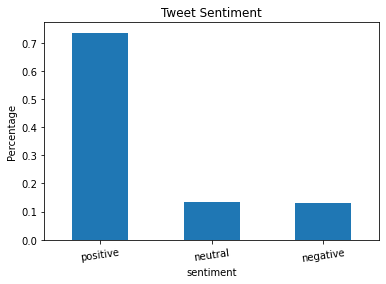

In [17]:
cols = cdf.columns.tolist()

col = cols[0]
print(col)


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = 'Tweet Sentiment', xlabel = col, ylabel= 'Percentage', rot=8)
plt.show()


C:\Users\berke\AppData\Local\Temp\ipykernel_14904\864664644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.topic.replace(0, 'arts & culture' , inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_14904\864664644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.topic.replace(5, 'fashion & style' , inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_14904\864664644.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

film tv & video             0.686667
 news & social concern      0.220000
gaming                      0.027333
 sports                     0.027333
arts & culture              0.012000
celebrity & pop culture     0.006667
business & entrepreneurs    0.006667
 music                      0.005333
food & dining               0.002667
diaries & daily life\t      0.002000
fashion & style             0.001333
 science & technology       0.000667
 other hobbies              0.000667
relationships               0.000667
Name: topic, dtype: float64


c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


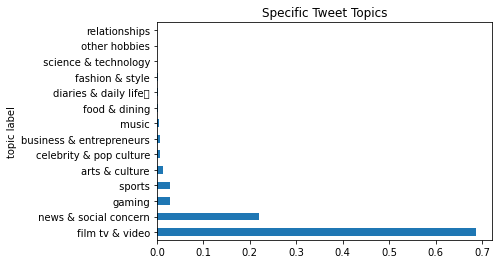

In [19]:
cols = cdf.columns.tolist()

col = cols[1]

cdf.topic.replace(0, 'arts & culture' , inplace = True)
cdf.topic.replace(5, 'fashion & style' , inplace = True)
cdf.topic.replace(10, ' learning & educational' , inplace = True)
cdf.topic.replace(15, ' science & technology' , inplace = True)
cdf.topic.replace(1, 'business & entrepreneurs' , inplace = True)
cdf.topic.replace(6, 'film tv & video' , inplace = True)
cdf.topic.replace(11, ' music' , inplace = True)
cdf.topic.replace(16, ' sports' , inplace = True)
cdf.topic.replace(2, 'celebrity & pop culture' , inplace = True)
cdf.topic.replace(7, 'fitness & health' , inplace = True)
cdf.topic.replace(12, ' news & social concern' , inplace = True)
cdf.topic.replace(17, ' travel & adventure' , inplace = True)
cdf.topic.replace(3, 'diaries & daily life	' , inplace = True)
cdf.topic.replace(8, 'food & dining' , inplace = True)
cdf.topic.replace(13, ' other hobbies' , inplace = True)
cdf.topic.replace(18, ' youth & student life', inplace = True)
cdf.topic.replace(4, 'family' , inplace = True)
cdf.topic.replace(14, 'relationships' , inplace = True)
cdf.topic.replace(9, 'gaming' , inplace = True)


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'barh', title = 'Specific Tweet Topics', xlabel = col+' label', ylabel= 'Percentage')
plt.show()

pop_culture                 0.664000
science_&_technology        0.126667
sports_&_gaming             0.113333
business_&_entrepreneurs    0.096000
Name: topic_single, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_14904\2136822223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.topic_single.replace(0, 'arts_&_culture', inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_14904\2136822223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.topic_single.replace(1, 'business_&_entrepreneurs', inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_14904\2136822223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

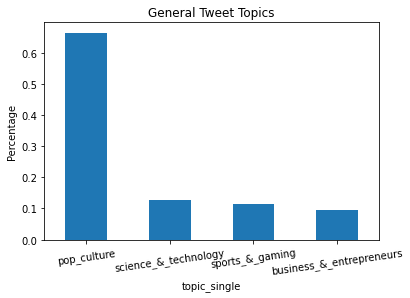

In [22]:
cols = cdf.columns.tolist()

cdf.topic_single.replace(0, 'arts_&_culture', inplace = True) 
cdf.topic_single.replace(1, 'business_&_entrepreneurs', inplace = True) 
cdf.topic_single.replace(2, 'pop_culture', inplace = True) 
cdf.topic_single.replace(3, 'daily_life', inplace = True) 
cdf.topic_single.replace(4, 'sports_&_gaming', inplace = True) 
cdf.topic_single.replace(5, 'science_&_technology', inplace = True) 

col = cols[2]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = 'General Tweet Topics', xlabel = col, ylabel= 'Percentage', rot=8)
plt.show()

C:\Users\berke\AppData\Local\Temp\ipykernel_14904\2750979050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.user_topic_mode.replace(0, 'arts & culture' , inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_14904\2750979050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.user_topic_mode.replace(5, 'fashion & style' , inplace = True)
C:\Users\berke\AppData\Local\Temp\ipykernel_14904\2750979050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

film tv & video             0.490275
celebrity & pop culture     0.280349
 sports                     0.071764
 news & social concern      0.067740
gaming                      0.029510
diaries & daily life\t      0.021462
arts & culture              0.018779
business & entrepreneurs    0.006036
 music                      0.004695
 science & technology       0.003353
 other hobbies              0.002012
fashion & style             0.001341
food & dining               0.001341
 travel & adventure         0.000671
 learning & educational     0.000671
Name: user_topic_mode, dtype: float64


c:\Users\berke\anaconda3\envs\env-pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


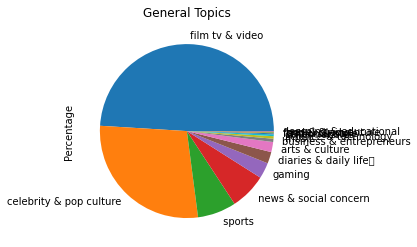

In [28]:
cols = cdf.columns.tolist()

cdf.user_topic_mode.replace(0, 'arts & culture' , inplace = True)
cdf.user_topic_mode.replace(5, 'fashion & style' , inplace = True)
cdf.user_topic_mode.replace(10, ' learning & educational' , inplace = True)
cdf.user_topic_mode.replace(15, ' science & technology' , inplace = True)
cdf.user_topic_mode.replace(1, 'business & entrepreneurs' , inplace = True)
cdf.user_topic_mode.replace(6, 'film tv & video' , inplace = True)
cdf.user_topic_mode.replace(11, ' music' , inplace = True)
cdf.user_topic_mode.replace(16, ' sports' , inplace = True)
cdf.user_topic_mode.replace(2, 'celebrity & pop culture' , inplace = True)
cdf.user_topic_mode.replace(7, 'fitness & health' , inplace = True)
cdf.user_topic_mode.replace(12, ' news & social concern' , inplace = True)
cdf.user_topic_mode.replace(17, ' travel & adventure' , inplace = True)
cdf.user_topic_mode.replace(3, 'diaries & daily life	' , inplace = True)
cdf.user_topic_mode.replace(8, 'food & dining' , inplace = True)
cdf.user_topic_mode.replace(13, ' other hobbies' , inplace = True)
cdf.user_topic_mode.replace(18, ' youth & student life', inplace = True)
cdf.user_topic_mode.replace(4, 'family' , inplace = True)
cdf.user_topic_mode.replace(14, 'relationships' , inplace = True)
cdf.user_topic_mode.replace(9, 'gaming' , inplace = True)

col = cols[-1]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'pie', title = 'General Topics', xlabel = col, ylabel= 'Percentage')
plt.show()


0.0    0.979184
1.0    0.020816
Name: irony, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2757287860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(0,'Non-Ironic',inplace=True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2757287860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(1,'Ironic',inplace=True)


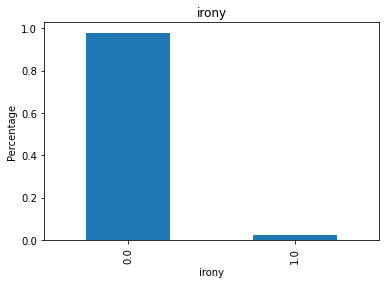

In [82]:
cols = cdf.columns.tolist()

cdf.gender.replace(0,'Non-Ironic',inplace=True)
cdf.gender.replace(1,'Ironic',inplace=True)

col = cols[4]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')
plt.show()

4.0     0.423673
7.0     0.153878
2.0     0.113878
6.0     0.089796
1.0     0.082041
0.0     0.080000
10.0    0.039184
14.0    0.005714
5.0     0.004898
11.0    0.003673
13.0    0.000816
16.0    0.000816
8.0     0.000408
3.0     0.000408
15.0    0.000408
9.0     0.000408
Name: emoji, dtype: float64


C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2448465951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(0,'Non-Ironic',inplace=True)
C:\Users\berke\AppData\Local\Temp\ipykernel_10488\2448465951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.gender.replace(1,'Ironic',inplace=True)


<AxesSubplot:title={'center':'emoji'}, xlabel='emoji', ylabel='Percentage'>

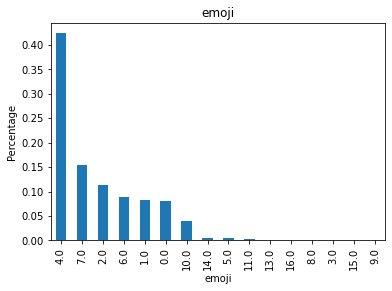

In [55]:
cols = cdf.columns.tolist()

cdf.gender.replace(0,'Non-Ironic',inplace=True)
cdf.gender.replace(1,'Ironic',inplace=True)

col = cols[5]


print(cdf[col].value_counts(normalize=True))
cdf[col].value_counts(normalize=True).plot(kind = 'bar', title = col, xlabel = col, ylabel= 'Percentage')

## Continuous

In [83]:
sdf.columns

Index(['text_word_count', 'polarity', 'subjectivity', 'num_male', 'num_female',
       'neg', 'neu', 'pos', 'compound', 'grammar-word-score', 'Kincaid', 'ARI',
       'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 'LIX',
       'SMOGIndex', 'RIX', 'DaleChallIndex', 'complex_words',
       'complex_words_dc', 'politeness', 'offensive', 'arts_&_culture',
       'business_&_entrepreneurs', 'celebrity_&_pop_culture',
       'diaries_&_daily_life', 'family', 'fashion_&_style', 'film_tv_&_video',
       'fitness_&_health', 'food_&_dining', 'gaming', 'learning_&_educational',
       'music', 'news_&_social_concern', 'other_hobbies', 'relationships',
       'science_&_technology', 'sports', 'travel_&_adventure',
       'youth_&_student_life', 'pop_culture', 'daily_life', 'sports_&_gaming',
       'joy', 'sadness', 'others', 'anger', 'surprise', 'disgust', 'hateful',
       'targeted', 'aggressive'],
      dtype='object')

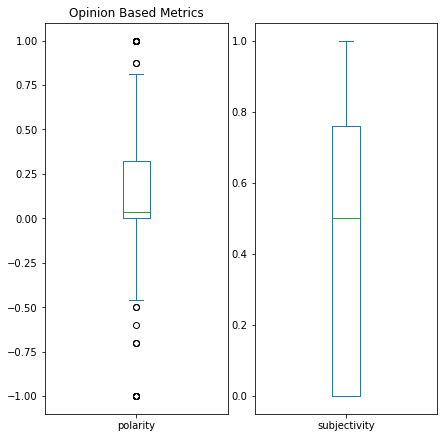

In [97]:

plt.subplot(131)
sdf['polarity'].plot( kind = 'box', title = 'Opinion Based Metrics', figsize=(9,6))
plt.tight_layout(pad=0.4)
plt.subplot(132)
sdf['subjectivity'].plot.box()
plt.tight_layout(pad=0.4)
plt.show()

ValueError: plot kind scatter can only be used for data frames

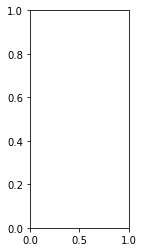

In [106]:

plt.subplot(131)
sdf['neg'].plot( kind = '', title = 'Opinion Based Metrics', figsize=(9,6))
plt.tight_layout(pad=0.4)
plt.subplot(132)
sdf['neu'].plot.box()
plt.tight_layout(pad=0.4)
plt.subplot(133)
sdf['pos'].plot.box()
plt.tight_layout(pad=0.4)
plt.show()

